In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#cargo los archivos csv

p_educacion = pd.read_csv('data/fiuba_1_postulantes_educacion.csv')
p_educacion.head()

,idpostulante,nombre,estado
0,NdJl,Posgrado,En Curso
1,8BkL,Universitario,En Curso
2,1d2B,Universitario,En Curso
3,NPBx,Universitario,En Curso
4,NPBx,Master,En Curso


In [3]:
#cargo los archivos csv
p_genero_edad = pd.read_csv('data/fiuba_2_postulantes_genero_y_edad.csv')
p_genero_edad.head()

,idpostulante,fechanacimiento,sexo
0,NM5M,1970-12-03,FEM
1,5awk,1962-12-04,FEM
2,ZaO5,1978-08-10,FEM
3,NdJl,1969-05-09,MASC
4,eo2p,1981-02-16,MASC


In [39]:
p_educacion['nombre'].value_counts()

Secundario           110256
Universitario        104295
Terciario/Técnico     47733
Otro                  24748
Posgrado               7387
Master                 3598
Doctorado               214
Name: nombre, dtype: int64

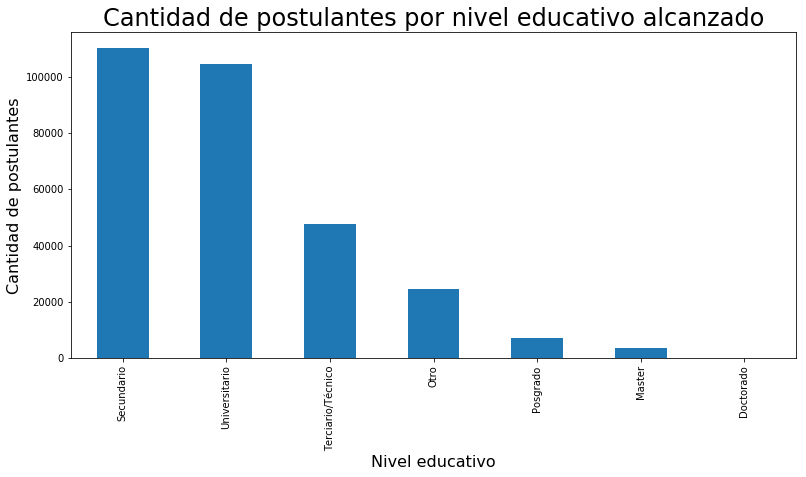

In [57]:
fig = plt.figure()

ax = p_educacion['nombre'].value_counts().plot(kind='bar',figsize=(13,6));

plt.title('Cantidad de postulantes por nivel educativo alcanzado', fontsize=24)

ax.set_xlabel('Nivel educativo', fontsize= 16)
ax.set_ylabel('Cantidad de postulantes', fontsize= 16);

In [58]:
p_educacion['estado'].value_counts()

Graduado      194474
En Curso       78531
Abandonado     25226
Name: estado, dtype: int64

In [51]:
filtered = p_educacion.loc[(p_educacion.estado=='Graduado')]

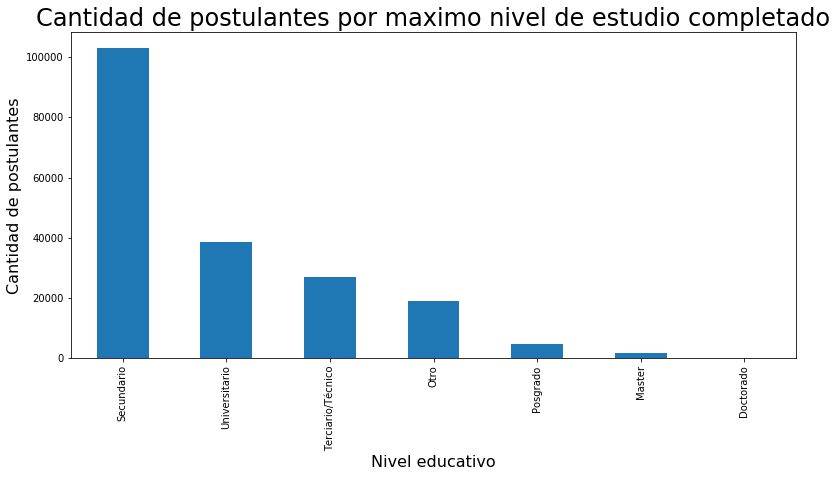

In [56]:
fig = plt.figure()

ax = filtered['nombre'].value_counts().plot(kind='bar',figsize=(13,6));

plt.title('Cantidad de postulantes por maximo nivel de estudio completado', fontsize=24)

ax.set_xlabel('Nivel educativo', fontsize= 16)
ax.set_ylabel('Cantidad de postulantes', fontsize= 16);

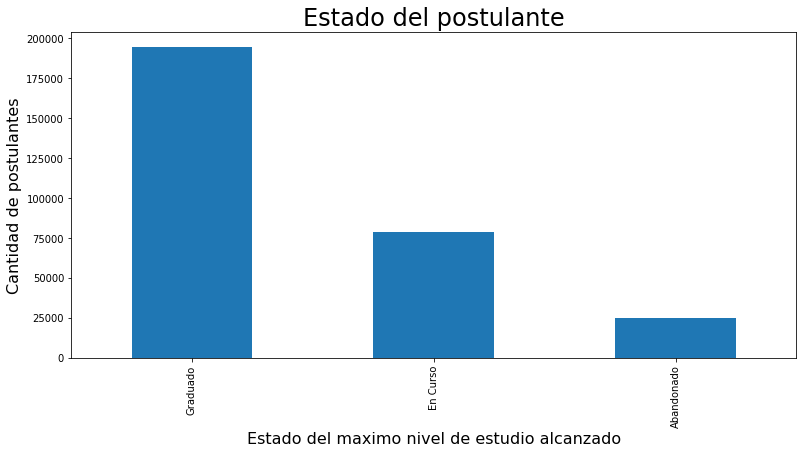

In [60]:
fig = plt.figure()

ax = p_educacion['estado'].value_counts().plot(kind='bar',figsize=(13,6));

plt.title('Estado del postulante', fontsize=24)

ax.set_xlabel('Estado del maximo nivel de estudio alcanzado', fontsize= 16)
ax.set_ylabel('Cantidad de postulantes', fontsize= 16);

In [61]:
p_genero_edad['sexo'].value_counts()

FEM           101981
MASC           94339
NO_DECLARA      4568
Name: sexo, dtype: int64

In [62]:
p_genero = p_genero_edad.loc[(p_genero_edad.sexo=='FEM') | (p_genero_edad.sexo=='MASC')]

In [63]:
p_genero['sexo'].value_counts()

FEM     101981
MASC     94339
Name: sexo, dtype: int64

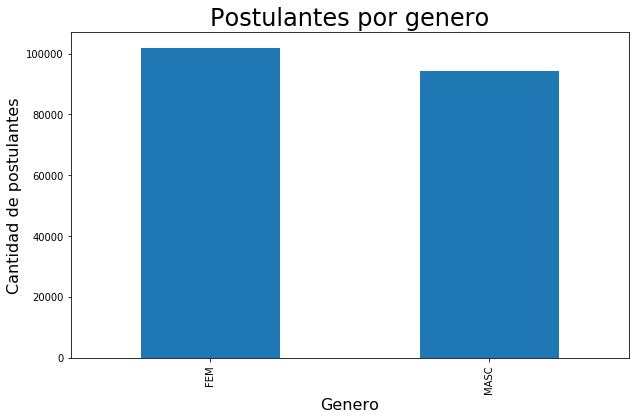

In [64]:
fig = plt.figure()

ax = p_genero['sexo'].value_counts().plot(kind='bar',figsize=(10,6));

plt.title('Postulantes por genero', fontsize=24)

ax.set_xlabel('Genero', fontsize= 16)
ax.set_ylabel('Cantidad de postulantes', fontsize= 16);

In [65]:
p_genero_edad.dtypes

idpostulante       object
fechanacimiento    object
sexo               object
dtype: object

In [67]:
#Convertimos fechanacimiento al formato de fechas
p_genero_edad.fechanacimiento = pd.to_datetime(p_genero_edad.fechanacimiento, format='%Y/%m/%d')
p_genero_edad['year'] = p_genero_edad['fechanacimiento'].map(lambda x: x.year)
p_genero_edad['month'] = p_genero_edad.fechanacimiento.dt.month.apply(lambda x: calendar.month_name[x])
p_genero_edad['Periodo'] = p_genero_edad['fechanacimiento'].map(lambda x: x.strftime('%Y-%m'))

ValueError: time data '0031-12-11' doesn't match format specified

In [69]:
#Antes de la convrsion, primero hay que limpiar las fechas defectuosas